### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [1]:
# <1> 
# Import libraries

#(Write code here)
import requests
import PyPDF2 
import pandas as pd
import urllib.request
import zipfile
import os
import matplotlib.pyplot as plt

In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
os.getcwd()

'/Users/jinqingliang/Desktop/Fall 2020/data690-01 visualilization/assignment/week6'

In [3]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
os.listdir('/Users/jinqingliang/Desktop/Fall 2020/data690-01 visualilization/assignment/week5')


['Five_States_Colleges.csv',
 'Assignment-05 -Copy1.ipynb',
 '.DS_Store',
 'Assignment-05.ipynb',
 'Assignment-06.ipynb',
 'CollegeScorecard_Raw_Data',
 '.ipynb_checkpoints',
 'CollegeScorecardDataDictionary.xlsx',
 'census_cost_cleansed.csv']

In [8]:
# Now I want to retrievel the file name and path from the folder in assignment 5
os.listdir('../week5/')

['Five_States_Colleges.csv',
 'Assignment-05 -Copy1.ipynb',
 '.DS_Store',
 'Assignment-05.ipynb',
 'Assignment-06.ipynb',
 'CollegeScorecard_Raw_Data',
 '.ipynb_checkpoints',
 'CollegeScorecardDataDictionary.xlsx',
 'census_cost_cleansed.csv']

In [9]:
file_list = os.listdir('../week5/CollegeScorecard_Raw_Data/')

In [10]:
file_path = os.getcwd().replace('week6', 'week5') + '/CollegeScorecard_Raw_Data'

In [11]:
file_path 

'/Users/jinqingliang/Desktop/Fall 2020/data690-01 visualilization/assignment/week5/CollegeScorecard_Raw_Data'

In [12]:
os.listdir()

['.DS_Store',
 'CollegeScorecard_Raw_Data',
 'Assignment_07.ipynb',
 '.ipynb_checkpoints']

In [13]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

#(Write code here)
file_list

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 '.DS_Store',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'Crosswalks.zip',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'data.yaml',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv']

In [14]:
def new_file_list(file_list):
    new_file_list = []
    for i in range(len(file_list)):
        if 'MERGED' in file_list[i]:
            new_file_list.append(file_list[i])
    return new_file_list    

In [15]:
cleaned_file_list =new_file_list(file_list)
cleaned_file_list

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv']

In [16]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

#(Write code here)
column_list = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]

df_list = []
for file in cleaned_file_list:
    df_tmp = pd.read_csv("../week5/CollegeScorecard_Raw_Data/" + file, usecols=column_list)
    df_tmp["YEAR"] = file[6:10]
    df_list.append(df_tmp)

df = pd.concat(df_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 7469
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44911 non-null   float64
 5   TUITIONFEE_IN  79194 non-null   float64
 6   YEAR           163331 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 10.0+ MB


In [17]:
df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5.0,0.5010,6828.0,2011
1,100663,University of Alabama at Birmingham,AL,5.0,0.7223,6264.0,2011
2,100690,Amridge University,AL,5.0,NaN,8720.0,2011
3,100706,University of Alabama in Huntsville,AL,5.0,0.6368,8094.0,2011
4,100724,Alabama State University,AL,5.0,0.5080,8082.0,2011
...,...,...,...,...,...,...,...
7465,45896402,Strayer University-Charleston Campus,SC,5.0,NaN,14085.0,2010
7466,45897301,Strayer University-Irving,TX,6.0,NaN,14085.0,2010
7467,45897302,Strayer University-Katy,TX,6.0,NaN,14085.0,2010
7468,45897303,Strayer University-Northwest Houston,TX,6.0,NaN,14085.0,2010


In [18]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
df.shape

(163331, 7)

In [19]:
df.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [20]:
df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5.0,0.5010,6828.0,2011
1,100663,University of Alabama at Birmingham,AL,5.0,0.7223,6264.0,2011
2,100690,Amridge University,AL,5.0,NaN,8720.0,2011
3,100706,University of Alabama in Huntsville,AL,5.0,0.6368,8094.0,2011
4,100724,Alabama State University,AL,5.0,0.5080,8082.0,2011


In [21]:
df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
7465,45896402,Strayer University-Charleston Campus,SC,5.0,NaN,14085.0,2010
7466,45897301,Strayer University-Irving,TX,6.0,NaN,14085.0,2010
7467,45897302,Strayer University-Katy,TX,6.0,NaN,14085.0,2010
7468,45897303,Strayer University-Northwest Houston,TX,6.0,NaN,14085.0,2010
7469,45897304,Strayer University-Plano,TX,6.0,NaN,14085.0,2010


In [22]:
df.sample()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1900,162168,Chesapeake College,MD,2.0,NaN,2130.0,2000


In [23]:
df.isnull().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [24]:
df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44911.000000,79194.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367
std,4.571721e+06,2.189217,0.217062,9985.998016
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [25]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
df[df['INSTNM'].str.contains('Baltimore County')&df['INSTNM'].str.contains('Maryland')]

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [26]:
df_UMBC = df[df['INSTNM'].str.contains('Baltimore County')&df['INSTNM'].str.contains('Maryland')]

In [27]:
df_UMBC = df_UMBC.sort_values(by = ['YEAR'])
df_UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [28]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)
df_UMBC.shape

(23, 7)

In [29]:
df_UMBC.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [30]:
df_UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [31]:
df_UMBC.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [32]:
df_UMBC.sample()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016


In [33]:
df_UMBC.isnull().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [34]:
df_UMBC.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


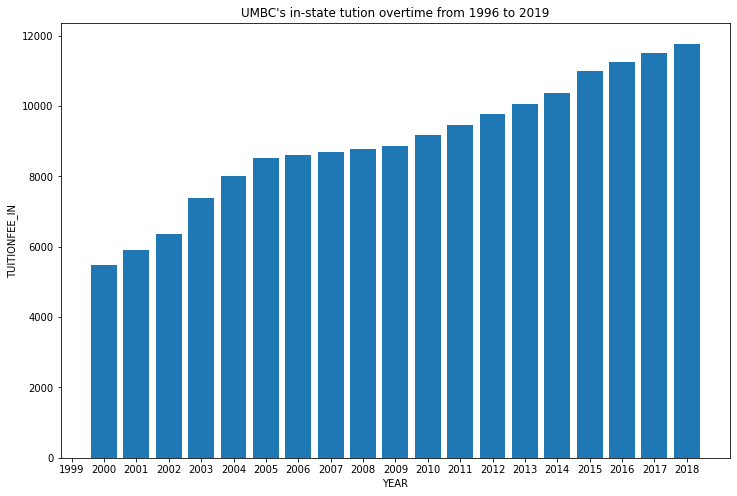

In [35]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(df_UMBC['YEAR'], df_UMBC['TUITIONFEE_IN'])
ax.set_title("UMBC's in-state tution overtime from 1996 to 2019")
ax.set_xlabel("YEAR")
ax.set_ylabel("TUITIONFEE_IN")

fig.show()


/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


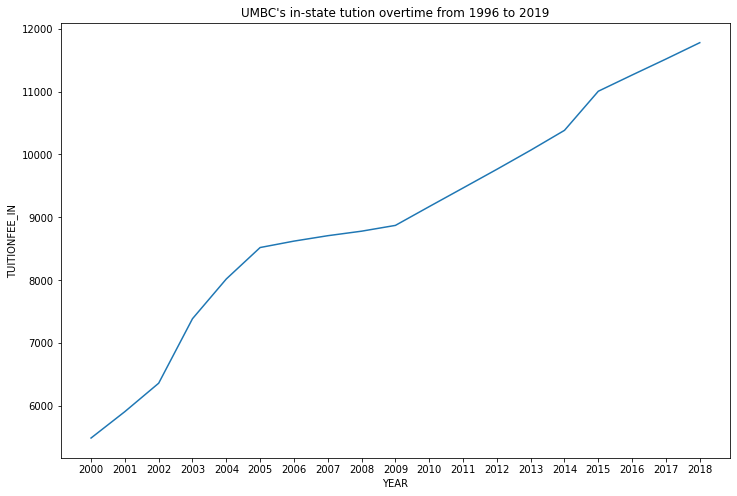

In [36]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df_UMBC['YEAR'], df_UMBC['TUITIONFEE_IN'])
ax.set_title("UMBC's in-state tution overtime from 1996 to 2019")
ax.set_xlabel("YEAR")
ax.set_ylabel("TUITIONFEE_IN")

fig.show()

In [37]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)
TUITIONFEE_IN = df_UMBC['TUITIONFEE_IN'].tolist()
TUITIONFEE_IN

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [38]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

 #(Write code here)
def percent_change_tuition(TUITIONFEE_IN):
    percent_change_tuition = []
    for i in range(len(TUITIONFEE_IN)):
        p = TUITIONFEE_IN[i]/TUITIONFEE_IN[i-1]-1
        percent_change_tuition.append(p)
    return  percent_change_tuition 

In [39]:
per_change_tui_list = percent_change_tuition(TUITIONFEE_IN)
per_change_tui_list

[nan,
 nan,
 nan,
 nan,
 nan,
 0.07650273224043724,
 0.07648054145516081,
 0.16127004086765173,
 0.08554412560909586,
 0.06234413965087282,
 0.011971830985915588,
 0.009974483878450568,
 0.0082682590721177,
 0.010478359908883794,
 0.03370153291253386,
 0.03227565151019518,
 0.03137213478398637,
 0.03113478082752974,
 0.03138657131505762,
 0.05989984591679498,
 0.02344175904052337,
 0.02254971590909083,
 0.02257336343115135]

In [40]:
len(per_change_tui_list)

23

In [41]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)
per_change_tui_list_rd = [round(x, 2) for x in per_change_tui_list]

In [42]:
per_change_tui_list_rd

[nan,
 nan,
 nan,
 nan,
 nan,
 0.08,
 0.08,
 0.16,
 0.09,
 0.06,
 0.01,
 0.01,
 0.01,
 0.01,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.06,
 0.02,
 0.02,
 0.02]

In [43]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
df_UMBC["PCT_CHANGE"] = per_change_tui_list_rd
df_UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,0.08
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,0.08
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,0.16
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,0.09
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,0.06


/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


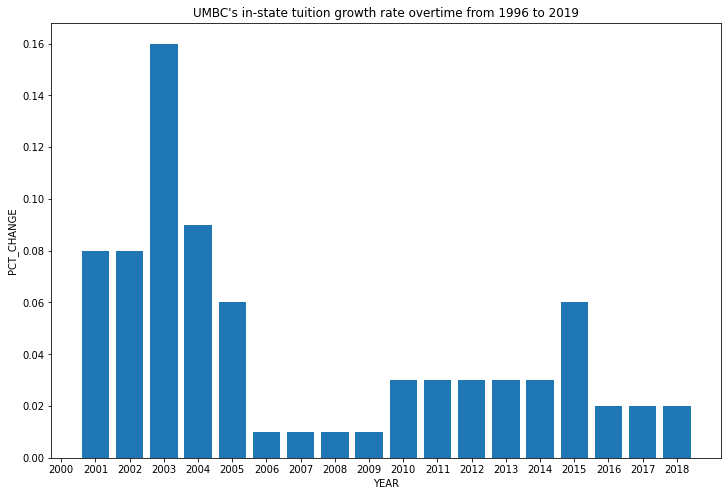

In [44]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(df_UMBC['YEAR'], df_UMBC['PCT_CHANGE'])
ax.set_title("UMBC's in-state tuition growth rate overtime from 1996 to 2019")
ax.set_xlabel("YEAR")
ax.set_ylabel("PCT_CHANGE")

fig.show()

In [45]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)
def percent_change_tuition(df, school_name):
    df = df[df['INSTNM'].str.contains(school_name)].sort_values(by = ['YEAR'])
    TUITIONFEE_IN = df['TUITIONFEE_IN'].tolist()
    percent_change_tuition = []
    for i in range(len(TUITIONFEE_IN)):
        p = TUITIONFEE_IN[i]/TUITIONFEE_IN[i-1]-1
        percent_change_tuition.append(p)
    per_change_tui_list_rd = [round(x, 2) for x in percent_change_tuition]
    return  per_change_tui_list_rd 

In [46]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
df_JHU = df[df['INSTNM'].str.contains('Johns Hopkins')].sort_values(by = ['YEAR'])
df_JHU

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


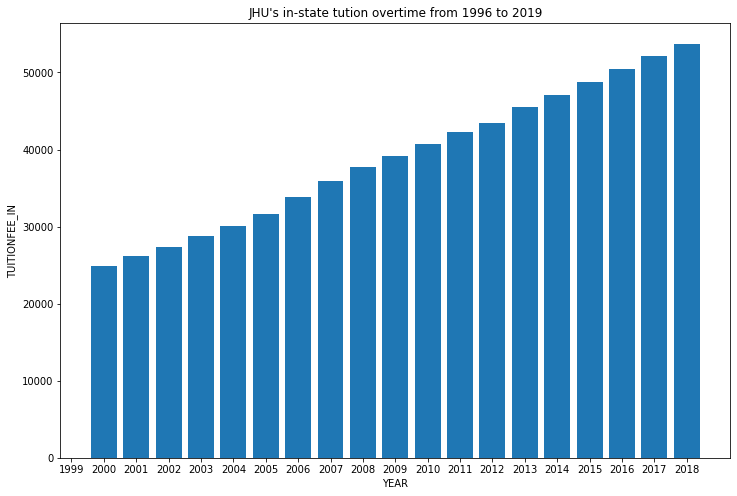

In [47]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(df_JHU['YEAR'], df_JHU['TUITIONFEE_IN'])
ax.set_title("JHU's in-state tution overtime from 1996 to 2019")
ax.set_xlabel("YEAR")
ax.set_ylabel("TUITIONFEE_IN")

fig.show()

/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


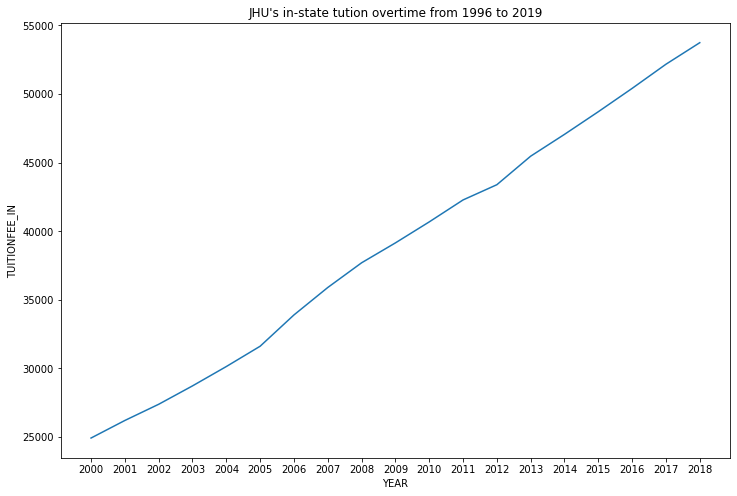

In [48]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df_JHU['YEAR'], df_JHU['TUITIONFEE_IN'])
ax.set_title("JHU's in-state tution overtime from 1996 to 2019")
ax.set_xlabel("YEAR")
ax.set_ylabel("TUITIONFEE_IN")

fig.show()

In [49]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)
percent_change_tuition(df, 'Johns Hopkins')


[nan,
 nan,
 nan,
 nan,
 nan,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.07,
 0.06,
 0.05,
 0.04,
 0.04,
 0.04,
 0.03,
 0.05,
 0.03,
 0.04,
 0.03,
 0.03,
 0.03]

In [50]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)

df_JHU['PCT_CHANGE'] = percent_change_tuition(df, 'Johns Hopkins')
df_JHU

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,0.05
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,0.05
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,0.05
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,0.05
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,0.05


/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


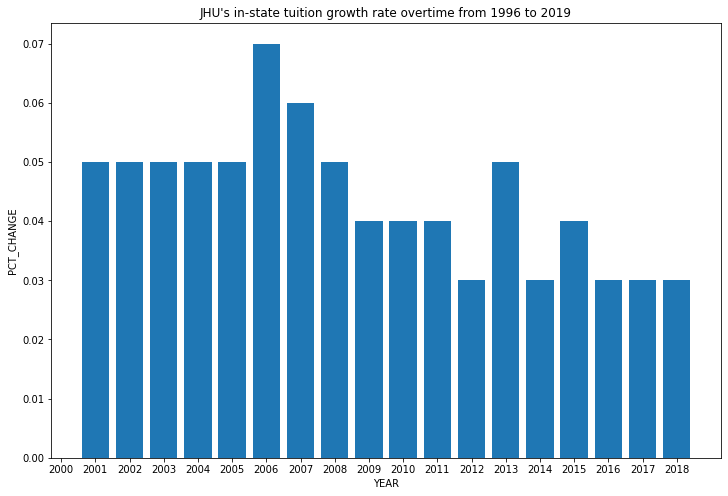

In [51]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(df_JHU['YEAR'], df_JHU['PCT_CHANGE'])
ax.set_title("JHU's in-state tuition growth rate overtime from 1996 to 2019")
ax.set_xlabel("YEAR")
ax.set_ylabel("PCT_CHANGE")

fig.show()


In [52]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)
umbc2 = df_UMBC[['PCT_CHANGE','YEAR']]
umbc2

,PCT_CHANGE,YEAR
2151,NaN,1996
2049,NaN,1997
1982,NaN,1998
1955,NaN,1999
1926,NaN,2000
1915,0.08,2001
1893,0.08,2002
1873,0.16,2003
1830,0.09,2004
1819,0.06,2005


In [53]:
umbc2 = umbc2.rename(columns={'PCT_CHANGE': 'UMBC_PCT'})
umbc2

,UMBC_PCT,YEAR
2151,NaN,1996
2049,NaN,1997
1982,NaN,1998
1955,NaN,1999
1926,NaN,2000
1915,0.08,2001
1893,0.08,2002
1873,0.16,2003
1830,0.09,2004
1819,0.06,2005


In [54]:
umbc2

,UMBC_PCT,YEAR
2151,NaN,1996
2049,NaN,1997
1982,NaN,1998
1955,NaN,1999
1926,NaN,2000
1915,0.08,2001
1893,0.08,2002
1873,0.16,2003
1830,0.09,2004
1819,0.06,2005


In [55]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)
jhu2 = df_JHU[['PCT_CHANGE','YEAR']]
jhu2 = jhu2.rename(columns={'PCT_CHANGE': 'JHU_PCT'})
jhu2

,JHU_PCT,YEAR
2139,NaN,1996
2039,NaN,1997
1973,NaN,1998
1946,NaN,1999
1917,NaN,2000
1906,0.05,2001
1884,0.05,2002
1865,0.05,2003
1823,0.05,2004
1812,0.05,2005


In [56]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)
UMBC_JHU = pd.merge(umbc2,jhu2, on='YEAR')
UMBC_JHU

,UMBC_PCT,YEAR,JHU_PCT
0,NaN,1996,NaN
1,NaN,1997,NaN
2,NaN,1998,NaN
3,NaN,1999,NaN
4,NaN,2000,NaN
5,0.08,2001,0.05
6,0.08,2002,0.05
7,0.16,2003,0.05
8,0.09,2004,0.05
9,0.06,2005,0.05


/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


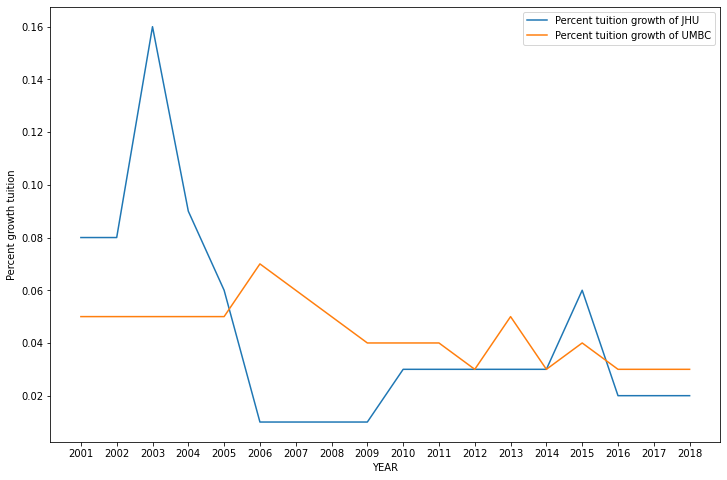

In [58]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(UMBC_JHU['YEAR'], UMBC_JHU['UMBC_PCT'], label = 'Percent tuition growth of JHU ')
ax.plot(UMBC_JHU['YEAR'], UMBC_JHU['JHU_PCT'],label = 'Percent tuition growth of UMBC')

#ax.set_title("JHU's in-state tution overtime from 1996 to 2019")
ax.set_xlabel("YEAR")
ax.set_ylabel("Percent growth tuition")
plt.legend()
fig.show()

/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


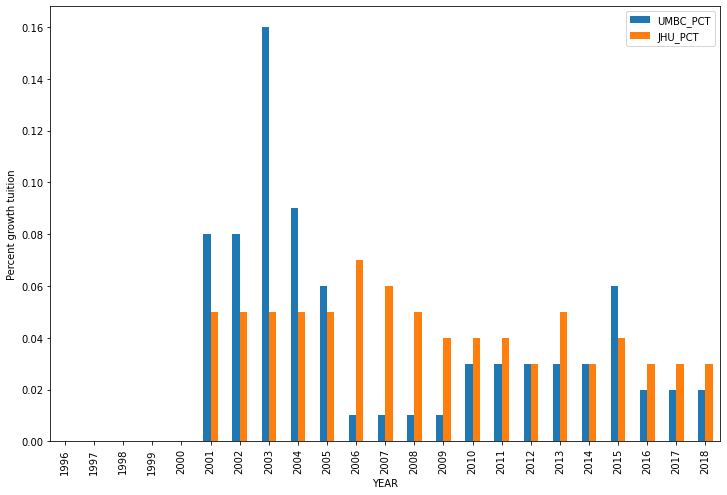

In [61]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))
UMBC_JHU.plot(x='YEAR', y=["UMBC_PCT","JHU_PCT"], ax=ax, kind="bar")

ax.set_xlabel("YEAR")
ax.set_ylabel("Percent growth tuition")
plt.legend()
fig.show()

/Users/jinqingliang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


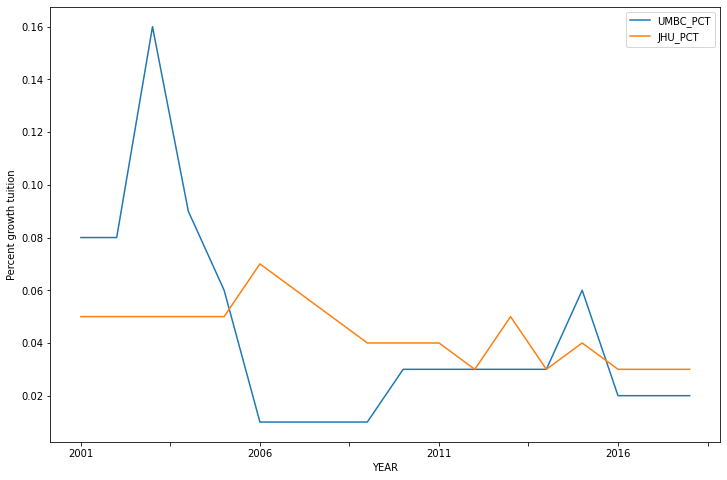

In [214]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)

fig, ax = plt.subplots(figsize=(12,8))
UMBC_JHU.plot(x='YEAR', y=["UMBC_PCT","JHU_PCT"], ax=ax)

ax.set_xlabel("YEAR")
ax.set_ylabel("Percent growth tuition")
plt.legend()
fig.show()

In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### The tuition of UMBC has a sharp increase during 2001-2006, then the growth rate was maintained in a constantly low level; the growth rate of tuition from JHU is relatively stable over the years.
####  I learned how to get the file pathway via os.getcwd()  and a current file pathway os.listdir('../abc/'), and open files using file paths.
####  I also learn a lot how to  make a bar plot and line plot via matplotlib.pyplot module. 
####  I learned how to clean the data, merge the data and conduct the analysis step by step. Which is very cool.
####  I learned why and how to creat a comparable graph in one plot.

In [ ]:
# The end. 